In [10]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

import plotly.io as pio

df = pd.read_csv("cohort_dataset.csv")
print(df.head())

         Date  New users  Returning users  Duration Day 1  Duration Day 7
0  25/10/2023       3461             1437      202.156977      162.523809
1  26/10/2023       3777             1554      228.631944      258.147059
2  27/10/2023       3100             1288      227.185841      233.550000
3  28/10/2023       2293              978      261.079545      167.357143
4  29/10/2023       2678             1082      182.567568      304.350000


In [4]:
df.shape

(30, 5)

In [5]:
df.info

<bound method DataFrame.info of           Date  New users  Returning users  Duration Day 1  Duration Day 7
0   25/10/2023       3461             1437      202.156977      162.523809
1   26/10/2023       3777             1554      228.631944      258.147059
2   27/10/2023       3100             1288      227.185841      233.550000
3   28/10/2023       2293              978      261.079545      167.357143
4   29/10/2023       2678             1082      182.567568      304.350000
5   30/10/2023       3748             1532      240.543956      210.900000
6   31/10/2023       3943             1603      184.194444      223.463415
7   01/11/2023       3568             1538      154.312925      180.655172
8   02/11/2023       3871             1540      188.531250      223.137931
9   03/11/2023       3772             1545      189.689394       81.705882
10  04/11/2023       2716             1126      200.044643      169.000000
11  05/11/2023       2907             1148      166.305556       92.

In [6]:
missing_values = df.isnull().sum()
print(missing_values)

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64


In [9]:
descriptive_stats = df.describe()
print(descriptive_stats)

         New users  Returning users  Duration Day 1  Duration Day 7
count    30.000000        30.000000       30.000000       30.000000
mean   3418.166667      1352.866667      208.259594      136.037157
std     677.407486       246.793189       64.730830       96.624319
min    1929.000000       784.000000       59.047619        0.000000
25%    3069.000000      1131.500000      182.974287       68.488971
50%    3514.500000      1388.000000      206.356554      146.381667
75%    3829.500000      1543.750000      230.671046      220.021875
max    4790.000000      1766.000000      445.872340      304.350000


In [8]:
data_types = df.dtypes
print(data_types)

Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object


In [17]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

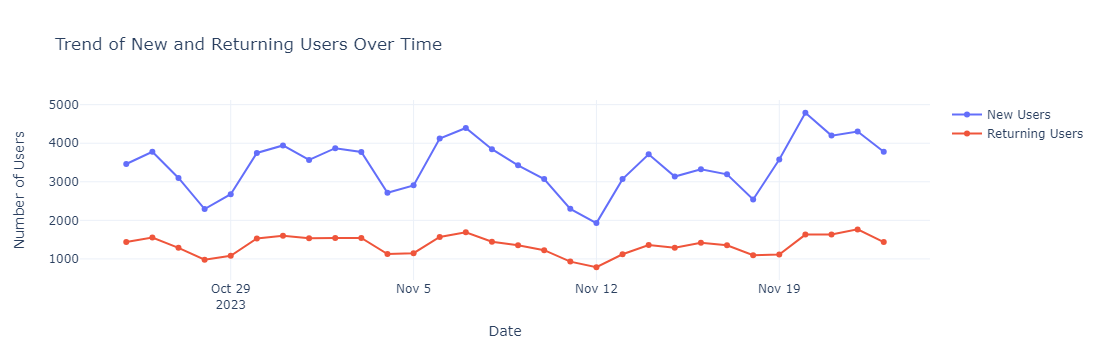

In [18]:
pio.templates.default = "plotly_white"

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['New users'], mode='lines+markers', name='New Users'))

fig.add_trace(go.Scatter(x=df['Date'], y=df['Returning users'], mode='lines+markers', name='Returning Users'))

fig.update_layout(title='Trend of New and Returning Users Over Time',
                  xaxis_title='Date',
                  yaxis_title='Number of Users')

fig.show()

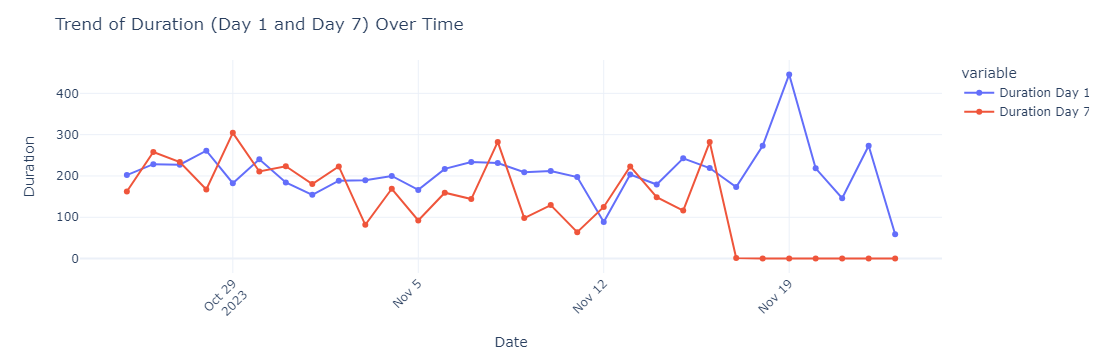

In [19]:
fig = px.line(data_frame=df, x='Date', y=['Duration Day 1', 'Duration Day 7'], markers=True, labels={'value': 'Duration'})
fig.update_layout(title='Trend of Duration (Day 1 and Day 7) Over Time', xaxis_title='Date', yaxis_title='Duration', xaxis=dict(tickangle=-45))
fig.show()

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

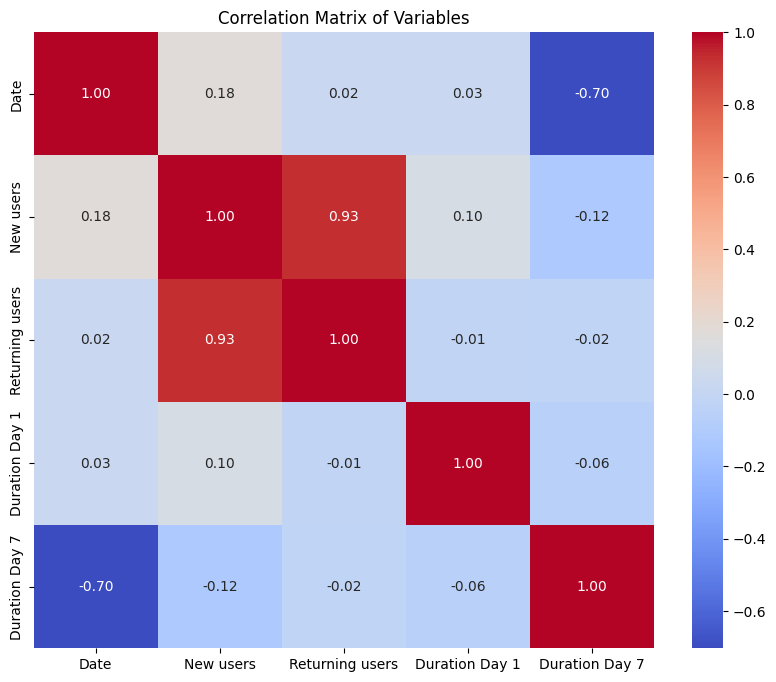

In [20]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

In [21]:
# Grouping data by week
df['Week'] = df['Date'].dt.isocalendar().week

# Calculating weekly averages
weekly_averages = df.groupby('Week').agg({
    'New users': 'mean',
    'Returning users': 'mean',
    'Duration Day 1': 'mean',
    'Duration Day 7': 'mean'
}).reset_index()

print(weekly_averages.head())

   Week    New users  Returning users  Duration Day 1  Duration Day 7
0    43  3061.800000      1267.800000      220.324375      225.185602
1    44  3503.571429      1433.142857      189.088881      168.723200
2    45  3297.571429      1285.714286      198.426524      143.246721
3    46  3222.428571      1250.000000      248.123542      110.199609
4    47  4267.750000      1616.250000      174.173330        0.000000


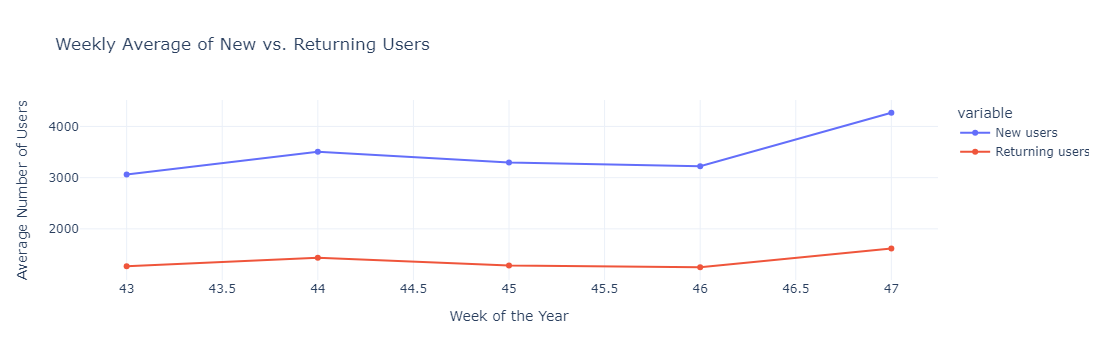

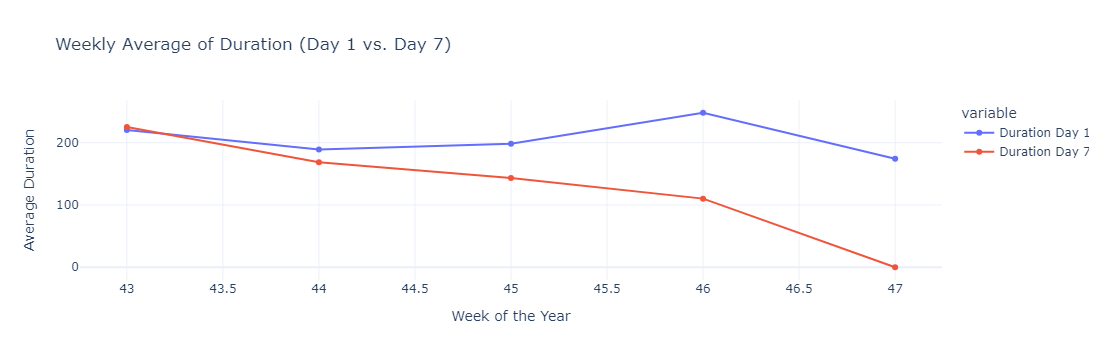

In [22]:
fig1 = px.line(weekly_averages, x='Week', y=['New users', 'Returning users'], markers=True,
               labels={'value': 'Average Number of Users'}, title='Weekly Average of New vs. Returning Users')
fig1.update_xaxes(title='Week of the Year')
fig1.update_yaxes(title='Average Number of Users')

fig2 = px.line(weekly_averages, x='Week', y=['Duration Day 1', 'Duration Day 7'], markers=True,
               labels={'value': 'Average Duration'}, title='Weekly Average of Duration (Day 1 vs. Day 7)')
fig2.update_xaxes(title='Week of the Year')
fig2.update_yaxes(title='Average Duration')

fig1.show()
fig2.show()

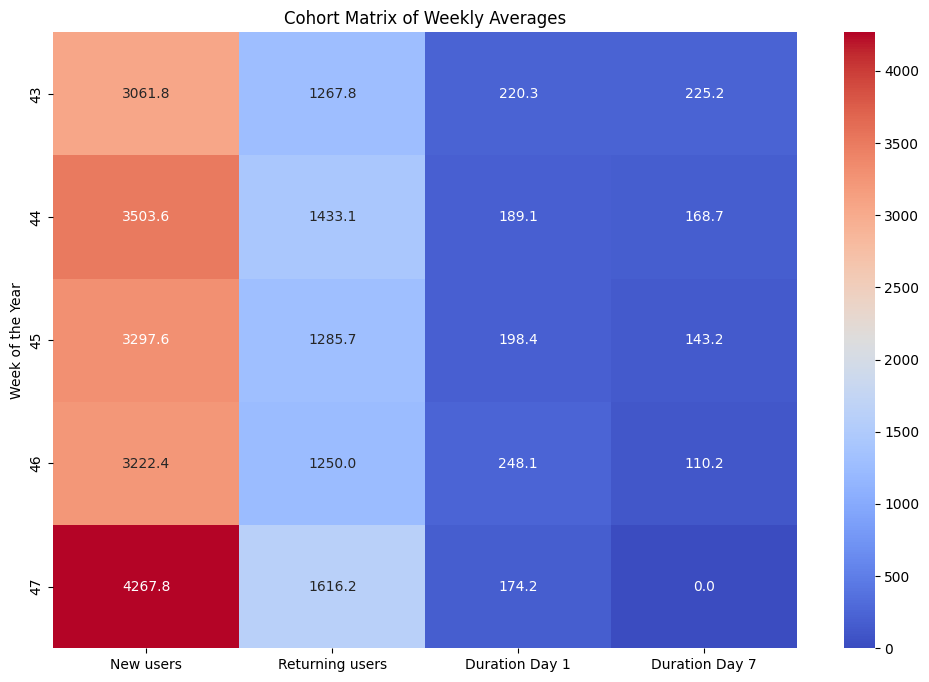

In [23]:
# Creating a cohort matrix
cohort_matrix = weekly_averages.set_index('Week')

# Plotting the cohort matrix
plt.figure(figsize=(12, 8))

sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()